In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load Dataset

In [3]:
file_path = "../data/clean/dataset_grouped.csv" # Don't forget to manually add the path of latest .csv from clean.ipynb
df = pd.read_csv(file_path)

print("Data Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Task      3024 non-null   object
 1   Category  3024 non-null   object
dtypes: object(2)
memory usage: 47.4+ KB
None

First 5 Rows:
                                                Task              Category
0          create email template for client response  not-urgent important
1                schedule time for physical activity  not-urgent important
2                           practice research design  not-urgent important
3  catch up on light, non-energy intensive task (...  not-urgent important
4                  volunteer at local animal shelter  not-urgent important


# Duplicate Check

In [4]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 1


#### Show some duplicates

In [5]:
duplicates = df[df.duplicated()]
print(duplicates.head())

                       Task              Category
838  meal prep for the week  not-urgent important


#### Delete duplicates

In [6]:
df = df.drop_duplicates()

# Plot a graph of label distribution


Label Distribution:
 Category
not-urgent important        775
not-urgent not-important    772
urgent important            769
urgent not-important        707
Name: count, dtype: int64


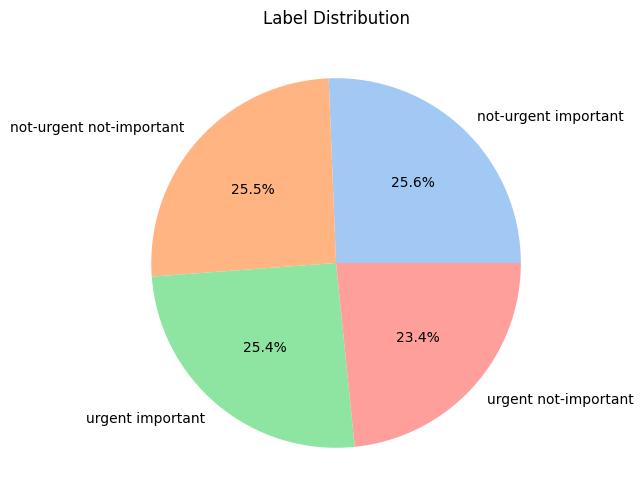

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18712\1499253763.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")


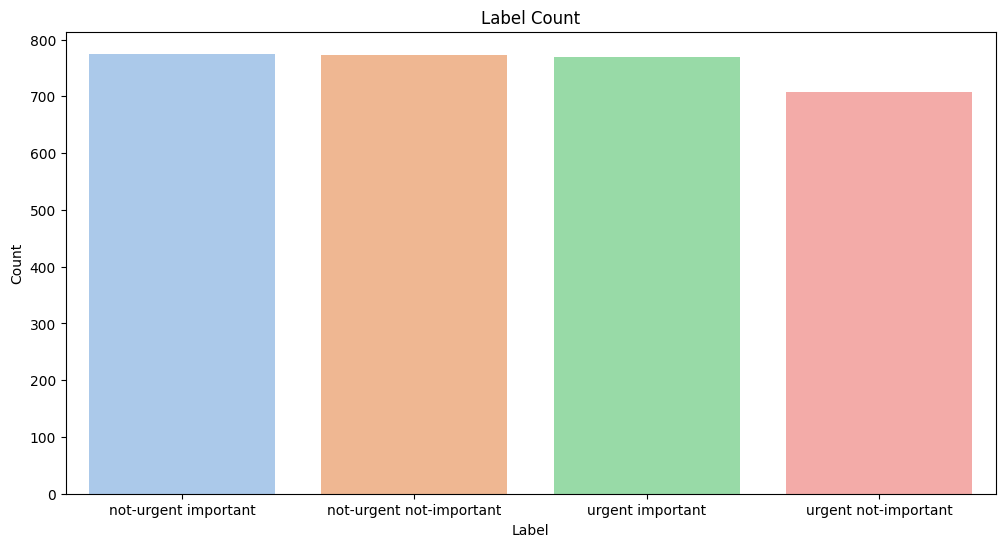

In [7]:
if 'Category' in df.columns:
    label_counts = df['Category'].value_counts()
    print("\nLabel Distribution:\n", label_counts)

    # Pie Chart Label Distribution
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title("Label Distribution")
    plt.ylabel('')
    plt.show()

    # Bar Chart Label Count
    plt.figure(figsize=(12, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="pastel")
    plt.title("Label Count")
    plt.ylabel("Count")
    plt.xlabel("Label")
    plt.show()

# Text Preprocessing Analysis


Text Length Summary:
count    3023.000000
mean       34.199802
std        12.361788
min         6.000000
25%        24.000000
50%        31.000000
75%        44.000000
max        74.000000
Name: text_length, dtype: float64


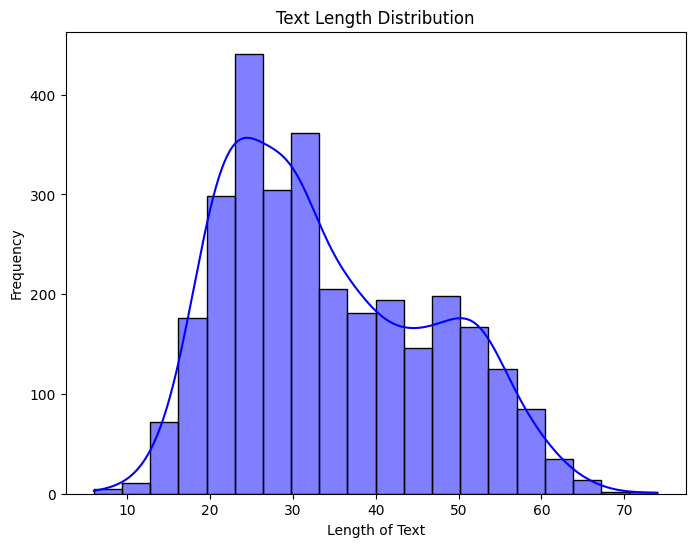

In [8]:
if 'Task' in df.columns:
    
    # Text Length Analysis
    df['text_length'] = df['Task'].apply(lambda x: len(str(x)))
    print("\nText Length Summary:")
    print(df['text_length'].describe())

    # Visualize Text Length Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['text_length'], bins=20, kde=True, color='blue')
    plt.title("Text Length Distribution")
    plt.xlabel("Length of Text")
    plt.ylabel("Frequency")
    plt.show()

    df = df.drop(columns=['text_length']) # To delete the 'text_length' column before saving the file


# Save Dataset

In [9]:
now = datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True) # To shuffle the data before saving

df_shuffled.to_csv(f"../data/clean/{now}.csv", index=False)